## Problem Statement : 
- This assignment is a programming assignment wherein we have to build a multiple linear regression model for the prediction of demand for shared bikes.
#### A US bike-sharing provider BoomBikes wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [766]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#To see all the columns
pd.set_option('display.max_columns', None)

## Step 1- Reading and Understanding Data

In [768]:
df=pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inferences by looking at the data
### Categorical Data:
- Season
- month
- weekday
- Weathersit
### Boolean/Binary Columns
- Year
- Holiday
- Workingday
### Continuous
- Temp
- aTemp
- Humidity(hum)
- windspeed
- Casual 
- Registered
### Date
- dteday

In [769]:
#Data Types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [770]:
#Statistical Data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [771]:
#checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Inference:
- There is no null data present in any of the column of the dataset

In [772]:
# Shape of data set
df.shape

(730, 16)

In [773]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<Figure size 720x1440 with 0 Axes>

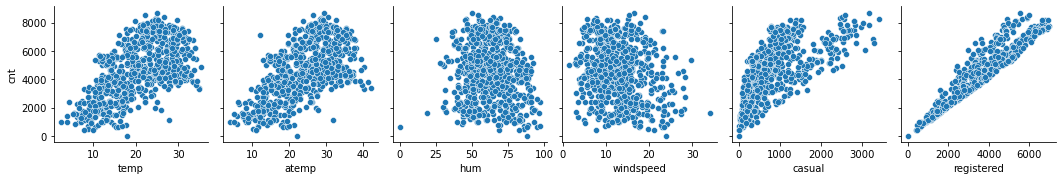

In [774]:
#Pair Plots between Numerical Features/Variable and target variable('cnt')
plt.figure(figsize=([10,20]))
sns.pairplot(df, x_vars=['temp', 'atemp', 'hum', 'windspeed','casual', 'registered'],y_vars='cnt',kind='scatter',diag_kind=None)
plt.show()

### Inference:
- The numerical variable ‘registered’ has the highest correlation with the target variable ‘cnt’

<AxesSubplot:>

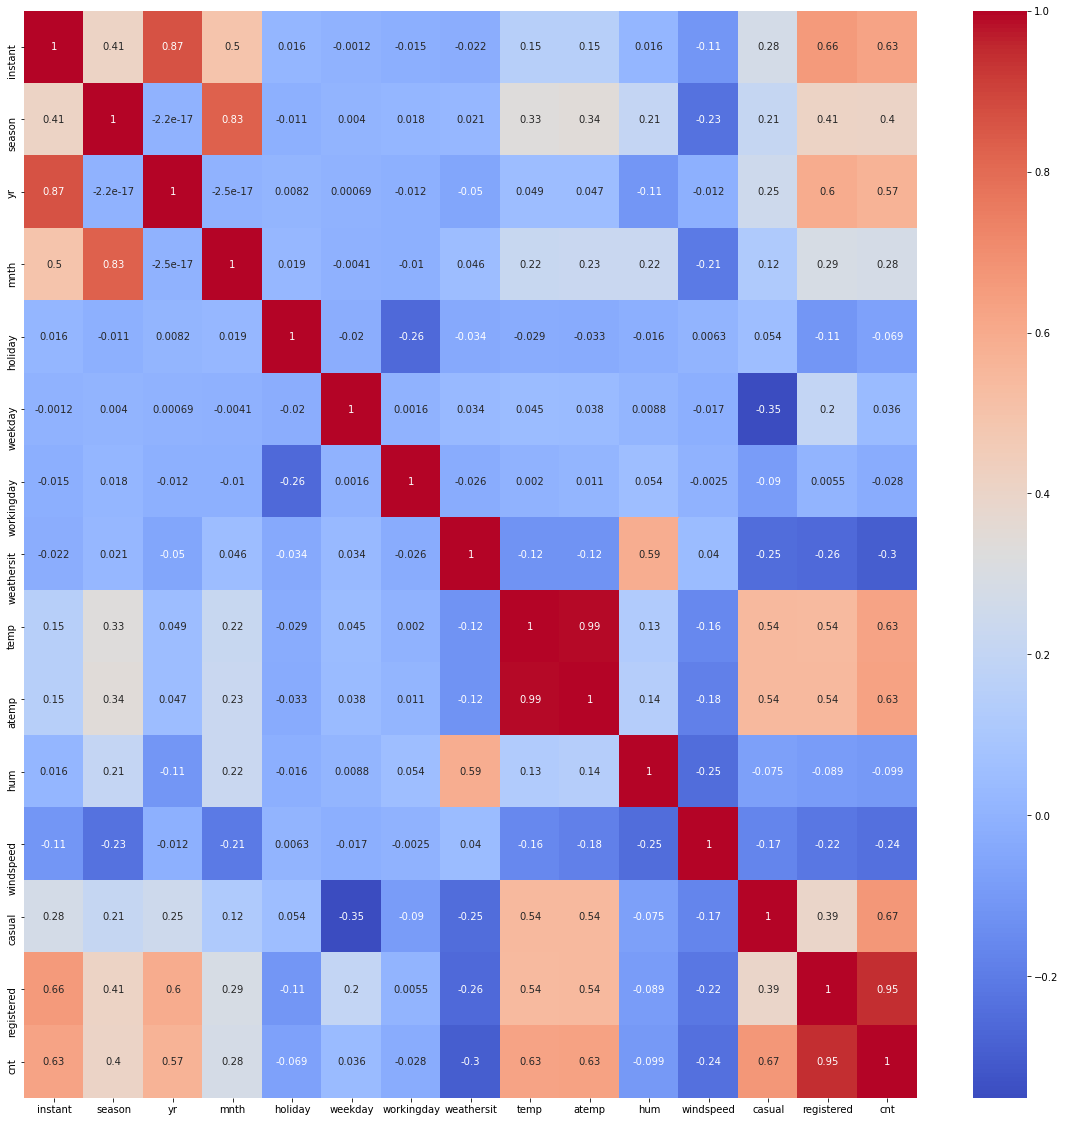

In [775]:
# Checking Correlation between dataset
plt.figure(figsize=([20,20]))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

### Inference:
- The numerical variable ‘registered’ has the highest correlation with the target variable ‘cnt’
- Temp and atemp are highly correlated

### Droping Instant, dteday, casual, registered columns
- Instant column represents Index which is of no use.
- Dteday because we already have month and year column.
- atemp and Temp shows the strong correlation of 0.99 (almost 1) which may affect in model building.
- Casual and registered whose sum is already stored in cnt value. 

In [776]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


### Categorical Data:
- Season
- month
- weekday
- Weathersit

In [777]:
#Converting Categorical columns to object type for applying further in pd.get_dummies() which accepts object data.
#df.season.value_counts()
#df.mnth.value_counts().index
#df.weathersit.value_counts()
#df.weekday.value_counts()
df.season=df.season.map({1:'spring',2:'summer',3:"Fall",4:"Winter"})
df.mnth=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
df.weekday=df.weekday.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:"Friday",5:"Saturday",6:"Sunday"})
df.weathersit=df.weathersit.map({1:'Clear',2:'Mist_cloudy',3:'Light_snow_rain'})
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Tuesday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Wednesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Thursday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Friday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Saturday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Saturday,1,Mist_cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,Dec,0,Sunday,0,Mist_cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,Dec,0,Monday,0,Mist_cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,Dec,0,Tuesday,1,Clear,10.489153,11.58500,48.3333,23.500518,1796


<AxesSubplot:>

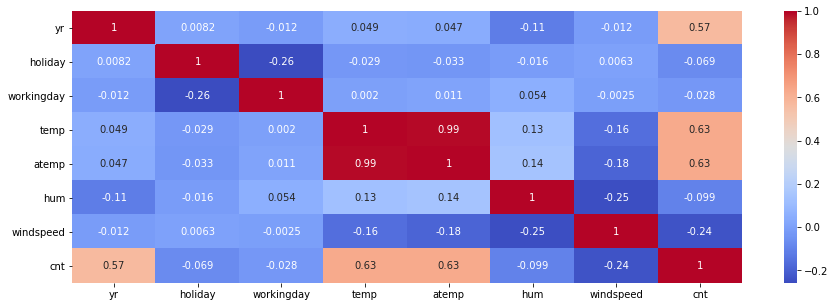

In [778]:
plt.figure(figsize=([15,5]))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

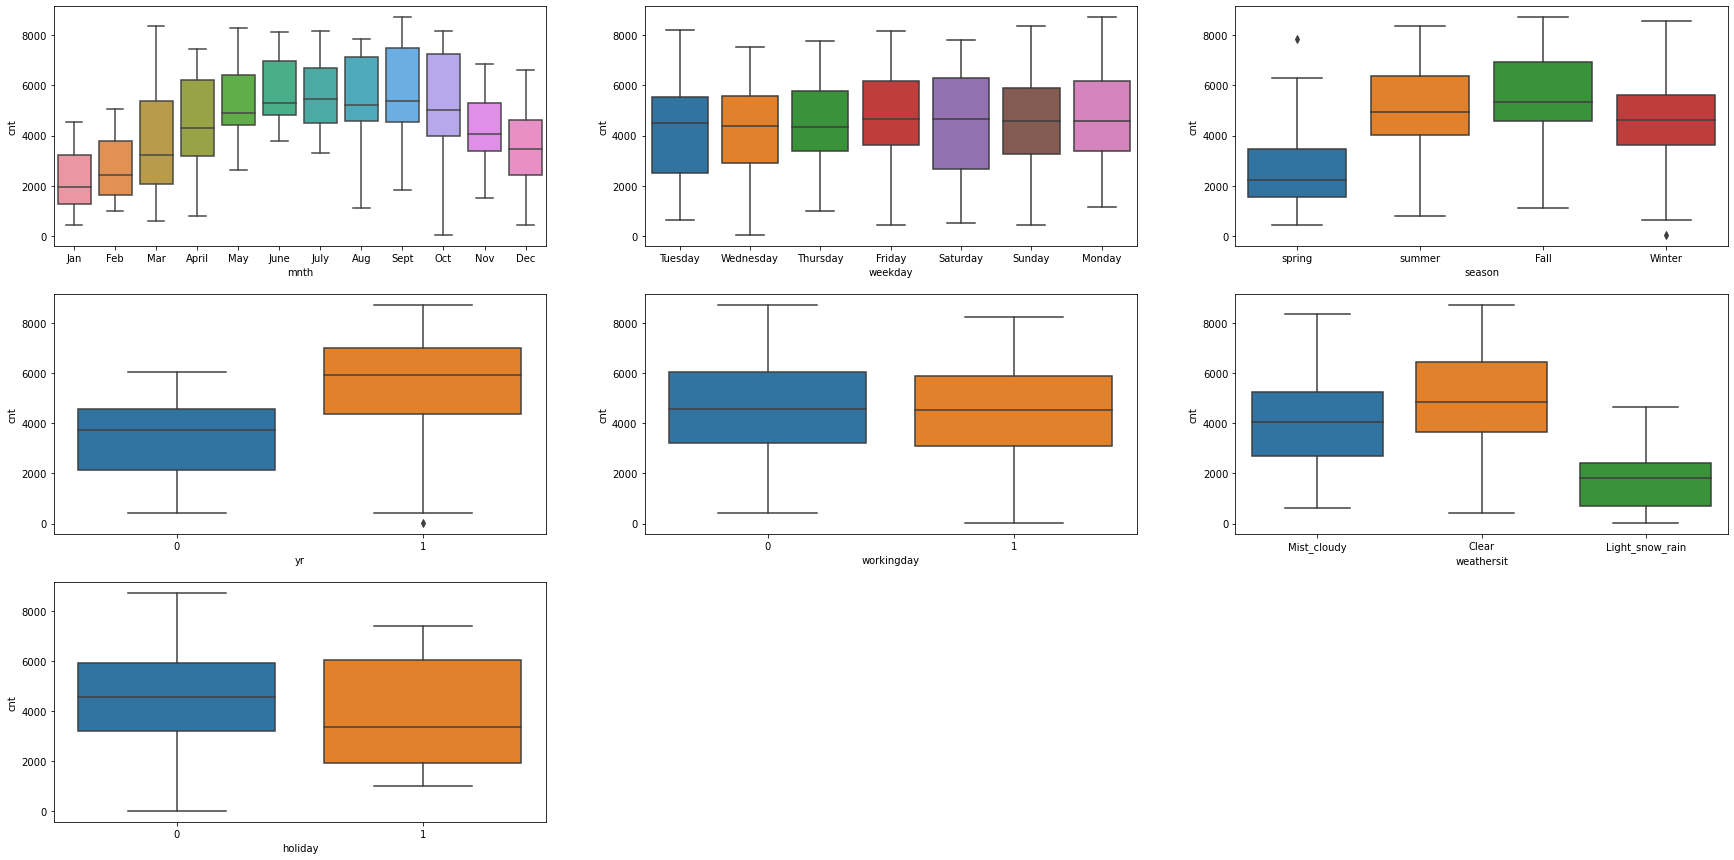

In [779]:
#Visualising categorical Variables to understand data better
#yr','mnth','workingday','weathersit','weekday'

plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(3,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(3,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(3,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

### Inferences:

- Demand Increases in the month of May,June,Aug & sept. In July, there is slight decrease in demand can be seen.
- There is very less demand of shared bikes in spring season
- Demand surges high in the year 2019 in comparision to its previous year
- Clear, Few clouds, Partly cloudy, Partly cloudy seems to be favorable atmosphere for the uses of shared bikes
- In holidays, company can expect to get increase in demand of shared bikes

## Step 2- Data Preparation

In [707]:
#Creating dummy variable for all the categorical columns
#For Season:
seas=pd.get_dummies(df.season,drop_first=True)
df=pd.concat([df,seas],axis=1)
df.drop('season',axis=1,inplace=True)
df

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Winter,spring,summer
0,0,Jan,0,Tuesday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0
1,0,Jan,0,Wednesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,0
2,0,Jan,0,Thursday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,0
3,0,Jan,0,Friday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,1,0
4,0,Jan,0,Saturday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,Saturday,1,Mist_cloudy,10.420847,11.33210,65.2917,23.458911,2114,0,1,0
726,1,Dec,0,Sunday,0,Mist_cloudy,10.386653,12.75230,59.0000,10.416557,3095,0,1,0
727,1,Dec,0,Monday,0,Mist_cloudy,10.386653,12.12000,75.2917,8.333661,1341,0,1,0
728,1,Dec,0,Tuesday,1,Clear,10.489153,11.58500,48.3333,23.500518,1796,0,1,0


In [708]:
#For weekday:
week=pd.get_dummies(df.weekday,drop_first=True)
df=pd.concat([df,week],axis=1)
df.drop('weekday',axis=1,inplace=True)
df

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Winter,spring,summer,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,Jan,0,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,1,0
1,0,Jan,0,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1
2,0,Jan,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,1,0,0
3,0,Jan,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0
4,0,Jan,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,1,Mist_cloudy,10.420847,11.33210,65.2917,23.458911,2114,0,1,0,0,1,0,0,0,0
726,1,Dec,0,0,Mist_cloudy,10.386653,12.75230,59.0000,10.416557,3095,0,1,0,0,0,1,0,0,0
727,1,Dec,0,0,Mist_cloudy,10.386653,12.12000,75.2917,8.333661,1341,0,1,0,1,0,0,0,0,0
728,1,Dec,0,1,Clear,10.489153,11.58500,48.3333,23.500518,1796,0,1,0,0,0,0,0,1,0


In [709]:
#For weathersit:
weather=pd.get_dummies(df.weathersit,drop_first=True)
df=pd.concat([df,weather],axis=1)
df.drop('weathersit',axis=1,inplace=True)
df.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,Winter,spring,summer,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snow_rain,Mist_cloudy
0,0,Jan,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,1,0,0,1
1,0,Jan,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,1
2,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,1,0,0,0,0
3,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,0,0
4,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,1,0,0,0,0,0,0


In [710]:
#For month:
month=pd.get_dummies(df.mnth,drop_first=True)
df=pd.concat([df,month],axis=1)
df.drop('mnth',axis=1,inplace=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Winter,spring,summer,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snow_rain,Mist_cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [711]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Winter', 'spring', 'summer', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light_snow_rain', 'Mist_cloudy',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sept'],
      dtype='object')

## Splitting the Data into Training and Testing Sets

In [712]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Winter,spring,summer,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snow_rain,Mist_cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
127,0,0,1,21.661653,25.94665,63.1667,5.000712,4333,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [713]:
#Normalising/Scaliing the data
#df=(df-df.min())/(df.max()-df.min())
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_col=['temp','atemp','hum','windspeed','cnt']
df_train[num_col]=scaler.fit_transform(df_train[num_col])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Winter,spring,summer,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snow_rain,Mist_cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [714]:
y_train=df_train.pop('cnt')
x_train=df_train

## Step 3- Building our model

In [715]:
# Importing RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [716]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

In [717]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Winter', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('Monday', False, 6),
 ('Saturday', False, 14),
 ('Sunday', False, 5),
 ('Thursday', False, 11),
 ('Tuesday', False, 8),
 ('Wednesday', False, 7),
 ('Light_snow_rain', True, 1),
 ('Mist_cloudy', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sept', True, 1)]

In [718]:
#Here rfe.support_ is the mask of selected features.
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
       False,  True])

In [719]:
#Selected Feature/Columns
scol=x_train.columns[rfe.support_]
scol

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Winter', 'spring',
       'summer', 'Light_snow_rain', 'Mist_cloudy', 'Dec', 'Jan', 'July', 'Nov',
       'Sept'],
      dtype='object')

In [720]:
#Not Selected Feature/Columns
x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [721]:
#Assigning all the selected feature to x_traim_lm
x_train_lm=x_train[scol]

In [722]:
x_train_lm

,yr,holiday,temp,hum,windspeed,Winter,spring,summer,Light_snow_rain,Mist_cloudy,Dec,Jan,July,Nov,Sept
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0,1,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,1,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,1,0,1,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,0,1,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,1,0,0,0,1,1,0,0,0,0
79,0,0,0.462664,0.759870,0.529881,0,0,1,0,1,0,0,0,0,0


In [723]:
#Building linear model 1
import statsmodels.api as sm 

x_train_lm1 = sm.add_constant(x_train_lm)

lr = sm.OLS(y_train, x_train_lm1).fit()

lr.params

const              0.319667
yr                 0.230404
holiday           -0.091089
temp               0.481503
hum               -0.162213
windspeed         -0.188726
Winter             0.101921
spring            -0.061255
summer             0.042337
Light_snow_rain   -0.246481
Mist_cloudy       -0.054300
Dec               -0.035461
Jan               -0.043411
July              -0.055250
Nov               -0.038701
Sept               0.075467
dtype: float64

In [724]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.15e-189
Time:                        19:52:52   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

In [725]:
# Calculate the VIFs for the new model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
6,spring,4.37
5,Winter,4.06
7,summer,2.82
9,Mist_cloudy,2.32
0,yr,2.09
13,Nov,1.85
11,Jan,1.75


In [726]:
# Drropping humidity as it has very high VIF which show high multi-collinearity
X=X.drop('hum',axis=1)

In [727]:
#Building linear model 2 without humdity feature
x_train_lm2 = sm.add_constant(X)

lr = sm.OLS(y_train, x_train_lm2).fit()

lr.params

const              0.245029
yr                 0.234455
holiday           -0.091776
temp               0.438717
windspeed         -0.158482
Winter             0.086883
spring            -0.071257
summer             0.034890
Light_snow_rain   -0.291749
Mist_cloudy       -0.080073
Dec               -0.042806
Jan               -0.050008
July              -0.050046
Nov               -0.039513
Sept               0.068730
dtype: float64

In [728]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.75e-186
Time:                        19:52:53   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032     

In [729]:
# Calculate the VIFs for the new model 2
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
4,Winter,2.95
5,spring,2.89
6,summer,2.24
0,yr,2.07
12,Nov,1.81
10,Jan,1.66
11,July,1.59
8,Mist_cloudy,1.57


In [730]:
#Dropping Nov because it pvalue=0.04
X=X.drop('Nov',axis=1)

In [731]:
#Building linear model 3 without Nov feature
x_train_lm3 = sm.add_constant(X)

lr = sm.OLS(y_train, x_train_lm3).fit()

lr.params

const              0.228272
yr                 0.234275
holiday           -0.098193
temp               0.458108
windspeed         -0.159364
Winter             0.077434
spring            -0.063192
summer             0.040370
Light_snow_rain   -0.287829
Mist_cloudy       -0.079315
Dec               -0.028270
Jan               -0.045128
July              -0.049881
Sept               0.074195
dtype: float64

In [732]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.74e-186
Time:                        19:52:53   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2283      0.031     

In [733]:
# Calculate the VIFs for the new model 3
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
5,spring,2.89
6,summer,2.24
0,yr,2.07
4,Winter,2.05
10,Jan,1.65
11,July,1.59
8,Mist_cloudy,1.57
12,Sept,1.34


In [734]:
# Dropping Dec feature because its p-value =0.084
X=X.drop('Dec',axis=1)

In [735]:
#Building linear model 4 without Dec feature
x_train_lm4 = sm.add_constant(X)

lr = sm.OLS(y_train, x_train_lm4).fit()

lr.params

const              0.215392
yr                 0.234283
holiday           -0.096758
temp               0.472115
windspeed         -0.154916
Winter             0.075655
spring            -0.061696
summer             0.043385
Light_snow_rain   -0.285425
Mist_cloudy       -0.079277
Jan               -0.038259
July              -0.050347
Sept               0.076399
dtype: float64

In [736]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.14e-187
Time:                        19:52:53   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030     

In [737]:
# Calculate the VIFs for the new model 4
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
5,spring,2.75
6,summer,2.24
0,yr,2.07
4,Winter,1.78
9,Jan,1.61
10,July,1.59
8,Mist_cloudy,1.56
11,Sept,1.34


In [738]:
# Dropping Jan feature because its p-value is much greater than that of others feature
X=X.drop('Jan',axis=1)

In [739]:
#Building linear model 5 without Jan feature
x_train_lm5 = sm.add_constant(X)

lr = sm.OLS(y_train, x_train_lm5).fit()

lr.params

const              0.199434
yr                 0.233570
holiday           -0.097463
temp               0.490988
windspeed         -0.147919
Winter             0.081741
spring            -0.067169
summer             0.046487
Light_snow_rain   -0.284199
Mist_cloudy       -0.080167
July              -0.052057
Sept               0.076846
dtype: float64

In [740]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.06e-187
Time:                        19:52:54   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [741]:
# Calculate the VIFs for the new model 4
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
6,summer,2.23
5,spring,2.08
0,yr,2.07
4,Winter,1.78
9,July,1.58
8,Mist_cloudy,1.55
10,Sept,1.34
7,Light_snow_rain,1.08


In [742]:
# Dropping windspeed feature because of its high vif value which shows high multi-collinearity
X=X.drop('windspeed',axis=1)

In [743]:
#Building linear model 6 without windspeed feature
x_train_lm6 = sm.add_constant(X)

lr = sm.OLS(y_train, x_train_lm6).fit()

lr.params

const              0.150081
yr                 0.232598
holiday           -0.100259
temp               0.502913
Winter             0.082879
spring            -0.076589
summer             0.036651
Light_snow_rain   -0.298944
Mist_cloudy       -0.078458
July              -0.052338
Sept               0.081182
dtype: float64

In [744]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.71e-181
Time:                        19:52:54   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1501      0.029     

In [745]:
# Calculate the VIFs for the new model 6
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.22
0,yr,2.06
5,summer,1.94
8,July,1.58
3,Winter,1.57
7,Mist_cloudy,1.55
4,spring,1.40
9,Sept,1.34
6,Light_snow_rain,1.07
1,holiday,1.04


#### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only i.e model 6.

## Step 4-  Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [746]:
y_train_pre = lr.predict(x_train_lm6)

Text(0.5, 0, 'Errors')

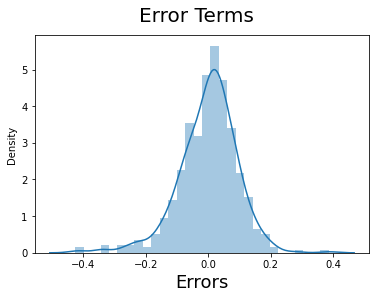

In [747]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pre), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

- The residuals are following the normally distributed with a mean 0. All good!

## Step 5- Making Predictions

#### Applying the scaling on the test sets

In [664]:
num_col1=['temp','atemp','hum','windspeed','cnt']
df_test[num_col]=scaler.transform(df_test[num_col1])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Winter,spring,summer,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snow_rain,Mist_cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Dividing into x_test and y_test

In [665]:
y_test=df_test.pop('cnt')
x_test=df_test

In [666]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_test_new = x_test[X.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

In [667]:
# Making predictions
y_pred = lr.predict(x_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

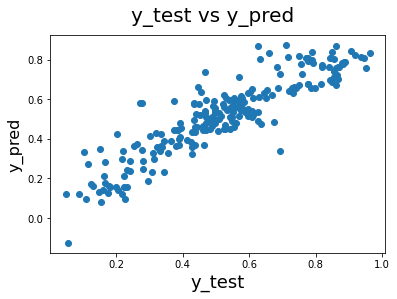

In [668]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  # Plot heading 
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)  

#### Inferences:
- We can see the see from the above scatter plot that the model is able to predict very well.
- The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [669]:
# Final selected variables which are significant in predicting the demand for shared bikes
lr.params

const              0.150081
yr                 0.232598
holiday           -0.100259
temp               0.502913
Winter             0.082879
spring            -0.076589
summer             0.036651
Light_snow_rain   -0.298944
Mist_cloudy       -0.078458
July              -0.052338
Sept               0.081182
dtype: float64

### Final selected variables which are significant in predicting the demand for shared bikes
1. yr                
2. holiday           
3. temp               
4. Winter             
5. spring            
6. summer            
7. Light_snow_rain   
8. Mist_cloudy       
9. July              
10. Sept 

In [670]:
# Importing sklearn following libraries for finding MSE(mean_squared_error) and R-Squared 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [671]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09549768259599091

###### Checking the R-squared on the test set

In [672]:
r_squared = r2_score(y_test, y_pred)
round(r_squared,4)

0.8093

###### Checking the adjusted R-squared on the test set


In [673]:
N=x_test.shape[0]
p=len(lr.params)-1 # No of predicted variables/features # len(lr.params)-1 is done to avoid the const/intercept during count
adj_r_sq=1-(1-r_squared)*(N-1)/(N-p-1)
round(adj_r_sq,4)

0.8001

### Final Result Comparision
#### Train Data Set
- R-squared:                       0.824
- Adj. R-squared:                  0.820

#### Test Data Set
- R-squared:                       0.8093
- Adj. R-squared:                  0.8001

# Equation for best fitted line is:

#### cnt = 0.150081 + yr * 0.232598 - holiday * 0.100259 + temp * 0.502913 + Winter * 0.082879 - spring * 0.076589 + summer * 0.036651 - Light_snow_rain * 0.298944 - Mist_cloudy * 0.078458 - July * 0.052338 + Sept * 0.081182

## We can see the demand for bikes depends mainly on below variables:

#### yr, holiday, temp, Winter, spring, summer, Light_snow_rain, Mist_cloudy, July, Sept

- Demand increases with the year, temp
- Demand increases in winter,summer and in the month of Sept
- Demand decreases if it is holiday , Spring, Light Snow_Light Rain + Thunderstorm + Scattered clouds, Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist and in the month of july